In [4]:
import os
import PIL
import tensorflow
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model


def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

BS= 32
TS=(24,24)
train_batch= generator('data/train',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator('data/valid',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)


# img,labels= next(train_batch)
# print(img.shape)

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history= model.fit_generator(train_batch, validation_data=valid_batch,epochs=100,steps_per_epoch=SPE ,validation_steps=VS)

model.save('models/cnnCat2.h5', overwrite=True)

Found 2467 images belonging to 4 classes.
Found 433 images belonging to 4 classes.
77 13
Epoch 1/100
77/77 [==============================] - 43s 490ms/step - loss: 0.7263 - accuracy: 0.6793 - val_loss: 0.4249 - val_accuracy: 0.7981
Epoch 2/100
77/77 [==============================] - 40s 518ms/step - loss: 0.4345 - accuracy: 0.7914 - val_loss: 0.3762 - val_accuracy: 0.8125
Epoch 3/100
77/77 [==============================] - 39s 506ms/step - loss: 0.3664 - accuracy: 0.8172 - val_loss: 0.3782 - val_accuracy: 0.8389
Epoch 4/100
77/77 [==============================] - 38s 488ms/step - loss: 0.3104 - accuracy: 0.8485 - val_loss: 0.3089 - val_accuracy: 0.8317
Epoch 5/100
77/77 [==============================] - 31s 407ms/step - loss: 0.2865 - accuracy: 0.8719 - val_loss: 0.3558 - val_accuracy: 0.8149
Epoch 6/100
77/77 [==============================] - 31s 398ms/step - loss: 0.2617 - accuracy: 0.8780 - val_loss: 0.2907 - val_accuracy: 0.8510
Epoch 7/100
77/77 [============================

Epoch 57/100
77/77 [==============================] - 31s 397ms/step - loss: 0.0061 - accuracy: 0.9979 - val_loss: 0.2971 - val_accuracy: 0.9495
Epoch 58/100
77/77 [==============================] - 32s 422ms/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.3368 - val_accuracy: 0.9495
Epoch 59/100
77/77 [==============================] - 31s 400ms/step - loss: 0.0099 - accuracy: 0.9975 - val_loss: 0.4075 - val_accuracy: 0.9423
Epoch 60/100
77/77 [==============================] - 31s 400ms/step - loss: 0.0150 - accuracy: 0.9938 - val_loss: 0.2420 - val_accuracy: 0.9567
Epoch 61/100
77/77 [==============================] - 31s 398ms/step - loss: 0.0111 - accuracy: 0.9959 - val_loss: 0.4169 - val_accuracy: 0.9183
Epoch 62/100
77/77 [==============================] - 31s 397ms/step - loss: 0.0121 - accuracy: 0.9947 - val_loss: 0.2799 - val_accuracy: 0.9495
Epoch 63/100
77/77 [==============================] - 31s 402ms/step - loss: 0.0131 - accuracy: 0.9959 - val_loss: 0.2999 - val_ac

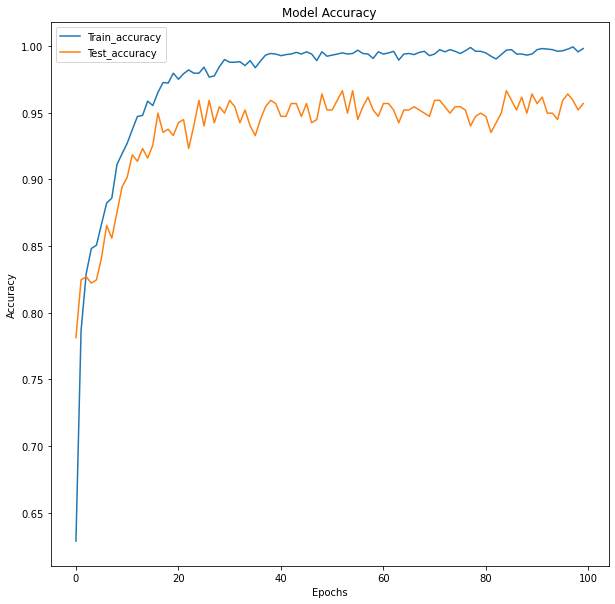

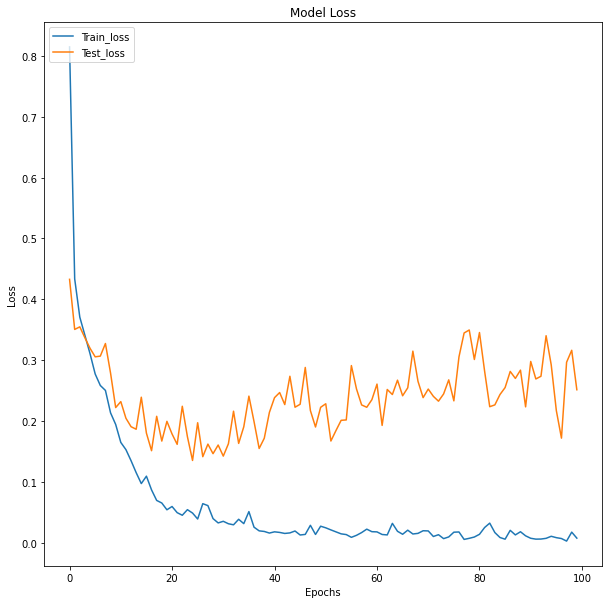

In [5]:
figure = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'], label='Train_accuracy')
plt.plot(history.history['val_accuracy'], label='Test_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label='Test_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 22, 22, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 18, 18, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 64)      

In [4]:
import cv2
import os
from keras.models import load_model
import numpy as np
from pygame import mixer
import time


mixer.init()
sound = mixer.Sound('alarm.wav')

face = cv2.CascadeClassifier('haar cascade files\haarcascade_frontalface_alt.xml')
leye = cv2.CascadeClassifier('haar cascade files\haarcascade_lefteye_2splits.xml')
reye = cv2.CascadeClassifier('haar cascade files\haarcascade_righteye_2splits.xml')


lbl=['Close','Open']

model = load_model('models/cnncat2.h5')
path = os.getcwd()
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
count=0
score=0
thicc=2
rpred=[99]
lpred=[99]

while(True):
    ret, frame = cap.read()
    height,width = frame.shape[:2] 

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face.detectMultiScale(gray,minNeighbors=5,scaleFactor=1.1,minSize=(25,25))
    left_eye = leye.detectMultiScale(gray)
    right_eye =  reye.detectMultiScale(gray)

    cv2.rectangle(frame, (0,height-50) , (200,height) , (0,0,0) , thickness=cv2.FILLED )

    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y) , (x+w,y+h) , (100,100,100) , 1 )

    for (x,y,w,h) in right_eye:
        r_eye=frame[y:y+h,x:x+w]
        count=count+1
        r_eye = cv2.cvtColor(r_eye,cv2.COLOR_BGR2GRAY)
        r_eye = cv2.resize(r_eye,(24,24))
        r_eye= r_eye/255
        r_eye=  r_eye.reshape(24,24,-1)
        r_eye = np.expand_dims(r_eye,axis=0)
        predict_r=model.predict(r_eye) 
        rpred = np.argmax(predict_r,axis=1)
        #rpred = model.predict(r_eye,axis=1)
        if(rpred[0]==1):
            lbl='Open' 
        if(rpred[0]==0):
            lbl='Closed'
        break

    for (x,y,w,h) in left_eye:
        l_eye=frame[y:y+h,x:x+w]
        count=count+1
        l_eye = cv2.cvtColor(l_eye,cv2.COLOR_BGR2GRAY)  
        l_eye = cv2.resize(l_eye,(24,24))
        l_eye= l_eye/255
        l_eye=l_eye.reshape(24,24,-1)
        l_eye = np.expand_dims(l_eye,axis=0)
        predict_l=model.predict(l_eye) 
        lpred=np.argmax(predict_l,axis=1)
        #lpred = model.predict(l_eye,axis=1)
        if(lpred[0]==1):
            lbl='Open'   
        if(lpred[0]==0):
            lbl='Closed'
        break

    if(rpred[0]==0 and lpred[0]==0):
        score=score+1
        cv2.putText(frame,"Closed",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    # if(rpred[0]==1 or lpred[0]==1):
    else:
        score=score-1
        cv2.putText(frame,"Open",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    
        
    if(score<0):
        score=0   
    cv2.putText(frame,'Score:'+str(score),(100,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    if(score>15):
        #person is feeling sleepy so we beep the alarm
        cv2.imwrite(os.path.join(path,'image.jpg'),frame)
        try:
            sound.play()
            
        except:  # isplaying = False
            pass
        if(thicc<16):
            thicc= thicc+2
        else:
            thicc=thicc-2
            if(thicc<2):
                thicc=2
        cv2.rectangle(frame,(0,0),(width,height),(0,0,255),thicc) 
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html
1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 43ms/step


KeyboardInterrupt: 

In [31]:
pip install pygame


  Using cached pygame-2.1.2-cp39-cp39-win_amd64.whl (8.4 MB)
